In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
ds = pd.read_csv("csv/cleaned_titanic_data.csv")

In [18]:
ds.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

In [19]:
X = ds.drop(columns = ['Survived'], axis = 1)

In [20]:
y = ds['Survived']

In [21]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [26]:
y_train[:5]


331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [27]:
y_train_pred[:5]


array([0, 0, 0, 0, 1])

In [28]:
y_test[:5]


709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [29]:
y_test_pred[:5]


array([0, 0, 0, 1, 1])

In [30]:
confusion_matrix(y_train, y_train_pred)


array([[380,  64],
       [ 87, 181]])

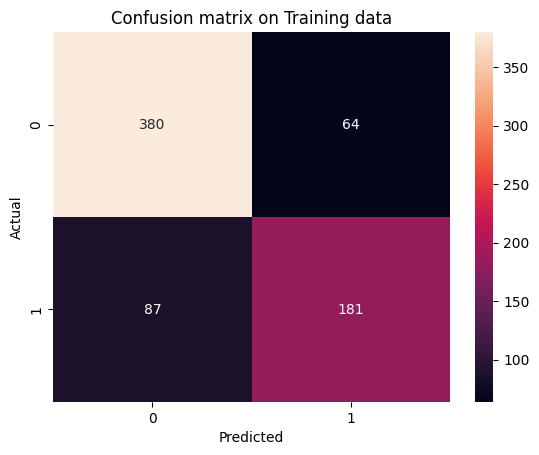

In [31]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.3g')
plt.title("Confusion matrix on Training data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [32]:
accuracy_score(y_train, y_train_pred)

0.7879213483146067

In [33]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



In [34]:
confusion_matrix(y_test, y_test_pred)

array([[88, 17],
       [22, 52]])

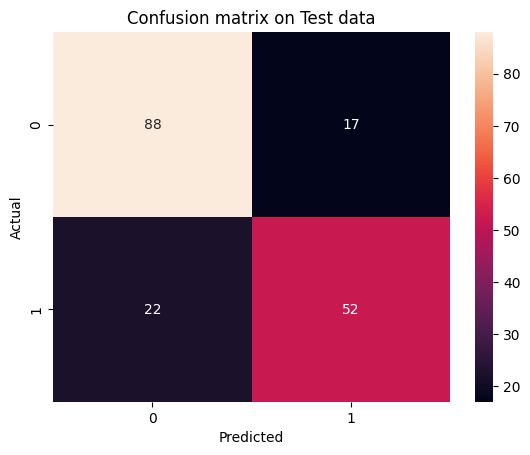

In [35]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.3g')
plt.title("Confusion matrix on Test data")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [36]:
accuracy_score(y_test, y_test_pred)


0.7821229050279329